### Importing Modules

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

### Loading datasets

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
dataset = pd.concat(objs=[train_df, test_df],axis=0).reset_index(drop=True)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Data Stats and Analysis

* Let us rely on the stats and stories unfolded from our data.
* Data analysis helps us to have an idea of important features, other probable contributing features, non-essential features etc.
* This ultimately helps to prepare our data so as to obtain best possible results in predictions.

In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


* There are 7 columns of numeric data --> *PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare*.
* Rest 5 are of categorical data --> *Name, Sex, Ticket, Cabin, Embarked* 
* Non-Null count above suggests that there might be null values in the data.

In [8]:
print("Train set dimensions: ",train_df.shape)
train_df.nunique()

Train set dimensions:  (891, 12)


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

* There are 891 samples in the train data.
* There are 891 distinct values of *'PassengerId'* column. Thus the basic intuitive thought that it doesn't contribute anything to analysis, is confirmed statistically.
* Thus we may drop *'PassengerId'* column.
* Similarly, there are 891 distinct values of *'Name'* column.

In [9]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

* Though the *'Name'* directly may not contribute to the analysis, we might engineer the column to extract features like 'Saluation', which might turn out to be useful in the analysis.

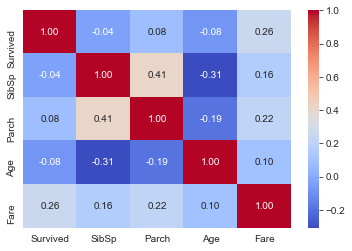

In [10]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

* *Fare* appears to be somewhat correlated to the Survival probability.
* Let us dig deeper to find if any hidden insights would turn up.

In [11]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

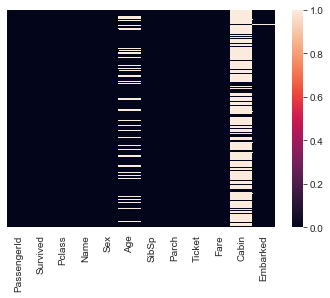

In [12]:
# visualizing the missing data

sns.heatmap(train_df.isnull(), yticklabels=False)

* *Age* and *Cabin* are apparently having missing data.
* *Cabin* has most of the data to be missing.

In [13]:
train_df.isnull().sum() * 100 / len(train_df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* There are about 
    * 0.2% values to be missing *'Embarked'* column.
    * 20% values to be missing *'Age'* column. 
    * 80% values to be missing *'Cabin'* column.


#### Age

* Let us visualize the distribution of *Age* data.

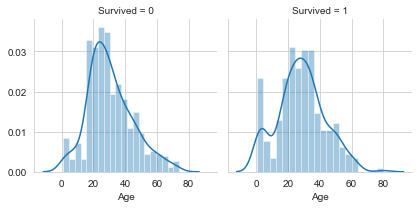

In [14]:
age_plot = sns.FacetGrid(train_df, col='Survived')
age_plot.map(sns.distplot, 'Age', bins=20)

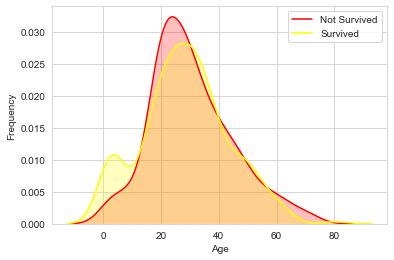

In [15]:
# Explore Age distibution 
g = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 0) & (train_df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 1) & (train_df["Age"].notnull())], ax =g, color="Yellow", shade = True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

* We could see a small peak for the younger(nearly of ages <15) ages to survive.
* From the correlation matrix of numerical data, it is evident that the age is not greatly correlated with the survival probability.
* But from the above plots of age, it is perceptible that subpopulation of age (children) have more chances of being survived.
* This is an interesting observation, and thus we should retain age in our data and impute the missing values.
* Let us further continue our data analysis.

#### Parch

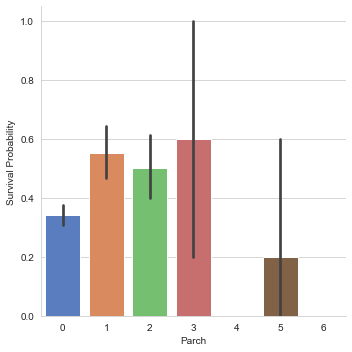

In [16]:
g  = sns.factorplot(x="Parch",y="Survived",data=train_df,kind="bar", size = 5, palette = "muted")
g = g.set_ylabels("Survival Probability")

* Medium sized families with size 1<=Parents/children<=3 had more chances of survival. Being short families they might have managed to rescue themselves well and fast.
* Nevertheless, families with 3 arents/children depict a high varibility of survaival.
* 0 parents/children had lesser chances of survival. This might have been so as they didn't have their own people to save them.
* Larger families with 4<=Parents/children<=6 had very poor rate of survival.

#### SibSp

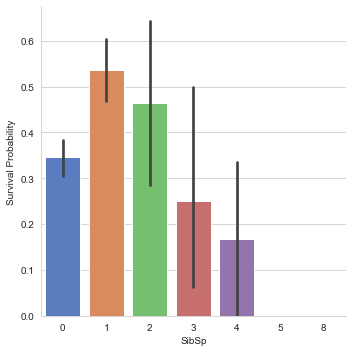

In [17]:
g  = sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar", size = 5, palette = "muted")
g = g.set_ylabels("Survival Probability")

* People with 1 or 2 siblings/spouse  had greater chances of survival.
* Larger number of siblings/spouse had less chances of survival.

* Observing the above obtained insights from *SibSp* and *Parch* features:
    * we could make out that larger families might have had greater difficulties escaping from the danger and save themselves. 
    * So, I feel that it would be reasonable to combine these to features to makeout a new feature representing the family size as a whole.

#### Fare

In [18]:
dataset["Fare"].isnull().sum()

1

* Since *Fare* is a numerical column, let us impute the missing value with median.

In [19]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())
dataset["Fare"].isnull().sum()

0

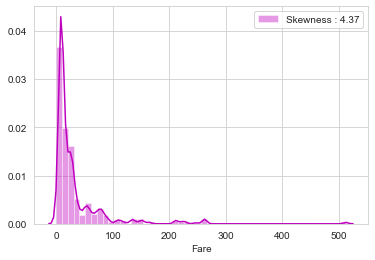

In [20]:
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

* The *Fare* data is quite skewed, this might lead to overweighed impression of the feature in the modeling.
* Let us log-transform the data to reduce skewness.

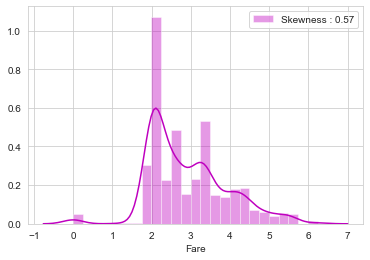

In [21]:
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

* This chart depicts an obvious reduction in the skewness of the *Fare*.

#### Sex

In [22]:
dataset["Sex"].isnull().sum()

0

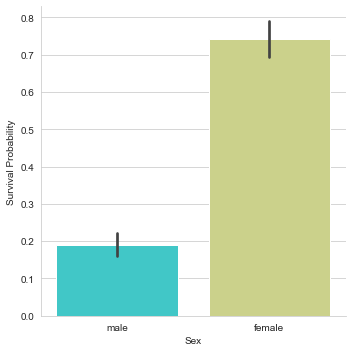

In [23]:
g  = sns.factorplot(x="Sex",y="Survived",data=train_df,kind="bar", size = 5, palette = "rainbow")
g = g.set_ylabels("Survival Probability")

* Females had quite a larger probability of survival as compared to males.

Text(0.5, 1.0, 'Male')

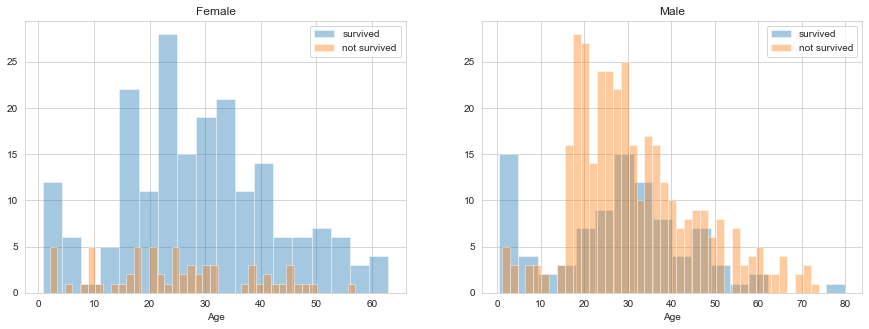

In [24]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
female = train_df[train_df['Sex']=='female']
male = train_df[train_df['Sex']=='male']

ax = sns.distplot(female[female['Survived']==1]['Age'].dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0]['Age'].dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(male[male['Survived']==1]['Age'].dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0]['Age'].dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

* The probability of survival is :
    * high in children
    * high in females of age around 15-42
    * males of age around 18-38 had higher rates of non-survival as compared to their survival probability. Whereas femlaes had very high chances of survival at this age group.
    * Thus age and sex are related to predict survival.

#### Pclass

In [25]:
dataset["Pclass"].isnull().sum()

0

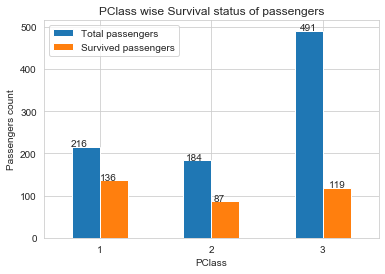

In [26]:
pclass_count = list(train_df['Pclass'].value_counts().sort_index())
survived_df = train_df[train_df.Survived==1]
survived_count = list(survived_df.Pclass.value_counts().sort_index())
index = sorted(train_df.Pclass.unique())
df = pd.DataFrame({'Total passengers':pclass_count,'Survived passengers':survived_count},index=index,columns=['Total passengers','Survived passengers'])
ax = df.plot.bar(rot=0)
ax.set_xlabel("PClass")
ax.set_ylabel("Passengers count")
ax.set_title("PClass wise Survival status of passengers")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() * 1.005))

* About 63% of *Pclass 1*, 47% of *Pclass 2* and 24% of *Pclass 3* are survived.
* So higher class people (socio-economically strong) have survived the most.

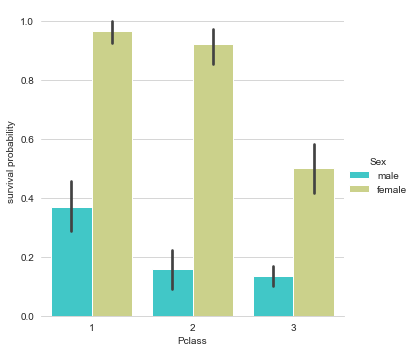

In [27]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train_df,size=5, kind="bar", palette="rainbow")
g.despine(left=True)
g = g.set_ylabels("survival probability")

* Females of the three Pclasses has higher probability of survival when compared to males.

#### Embarked

In [28]:
dataset["Embarked"].isnull().sum()

2

* Since this is a categorical variable, let us impute the missing values with mode.

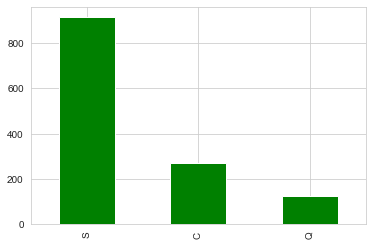

In [29]:
dataset["Embarked"].value_counts().plot(kind='bar', color='g')

In [30]:
print(dataset["Embarked"].mode())
dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])
dataset["Embarked"].isnull().sum()

0    S
dtype: object


0

Text(0.5, 1.0, 'Survival probability based on the Embarked')

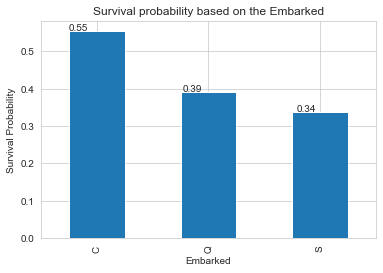

In [31]:
plt = train_df[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')
for p in plt.patches:
    plt.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.025, p.get_height() * 1.005))
plt.set_title("Survival probability based on the Embarked")

* The order of higher survival probability is C>Q~S.
* Thus the passengers from Cherbourg(C) had higher survival probability.

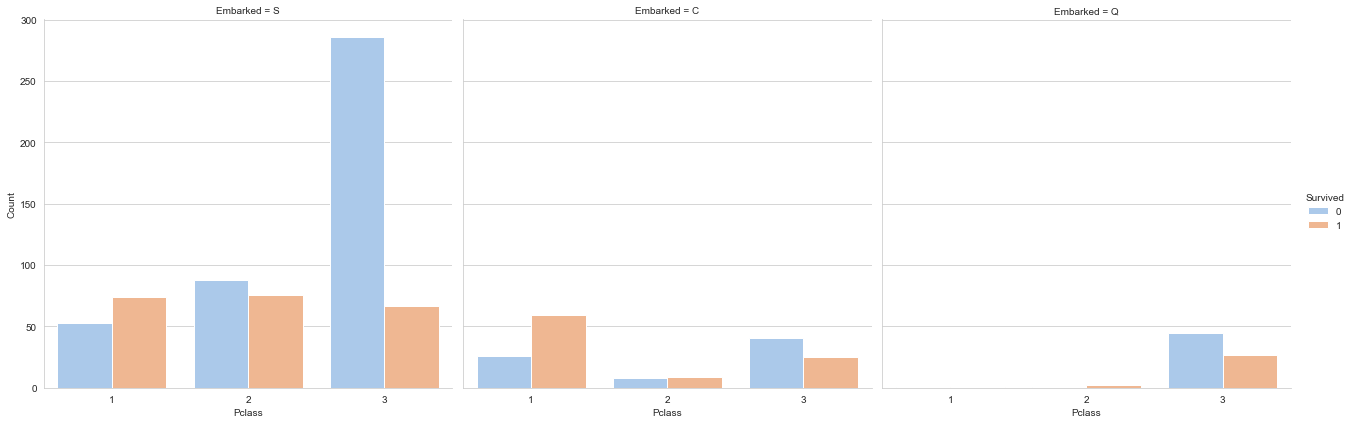

In [32]:
g = sns.factorplot("Pclass", col="Embarked",hue='Survived',  data=train_df, size=6, kind="count", palette="pastel")
g = g.set_ylabels("Count")

* As evident from both Pclass and Embarked, 
    * 1st class people had more survival probabilities than non.survival probabilities.
    * At port C, more people boarded into 1st class, conforming to the insight that the more people from C had survived.

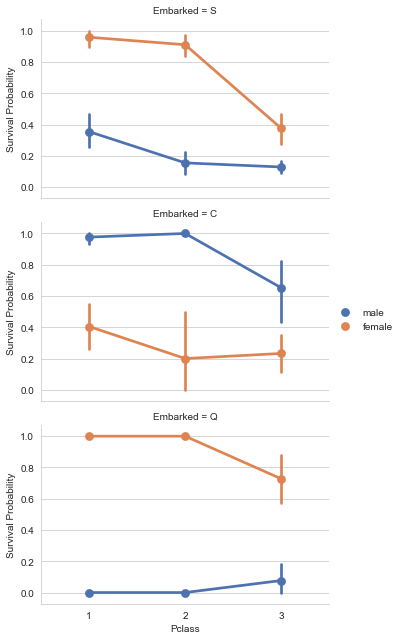

In [33]:
grid = sns.FacetGrid(train_df, row='Embarked', size=3, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.set_axis_labels(y_var="Survival Probability")
grid.add_legend()

* These plots point an exception where males had a higher probability of survival than females in Embarked=C.
* This might be due to the correlation between Embarked and Pclass, and in return that in between Pclass and Survived.

### Imputing Missing Data

#### Age

* Based on the observations made in the data analysis, let us try to find out the relation between Age vs Sex, Parch, SibSp and Pclass.

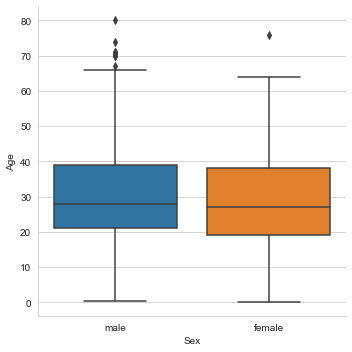

In [34]:
g = sns.factorplot(y="Age",x="Sex",data=dataset,kind="box")

* The *Age* distribution is apparently the same for both the sexes, thus it might not be useful to predict *Age*.

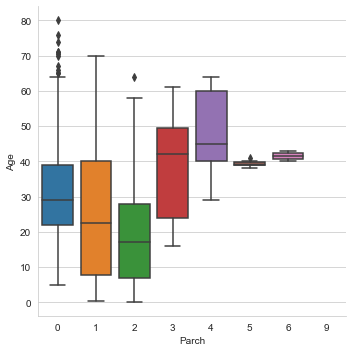

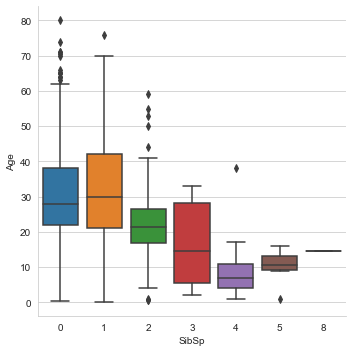

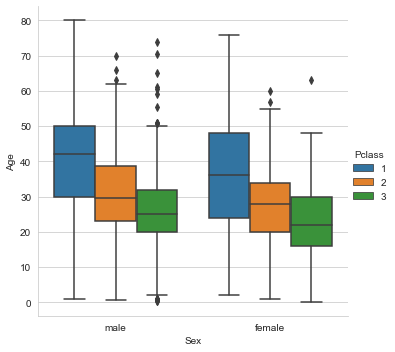

In [35]:
g = sns.factorplot(y="Age",x="Parch", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="SibSp", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")

* With varying distributions of *Age* for each category of variables, these three features seem to be informative to predict *Age*.
* Let us cross-check our intuitions with a correlation map.

In [36]:
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

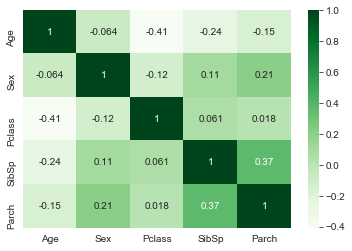

In [37]:
g = sns.heatmap(dataset[['Age','Sex','Pclass','SibSp','Parch']].corr(),cmap="Greens",annot=True)

* *Age* and *Sex* are not correlated.
* *Age* is negatively correlated with *Pclass*, *SibSp* and *Parch*.
* Let us consider *Pclass*, *SibSp* and *Parch* to impute missing *Age* values.

* Strategy to fill *Age* missing values:
    * Fill the missing age values with the median of age, if its corresponding values of *Pclass*, *SibSp* and *Parch* match.
    * Else, fill it with the median of *Age*.

In [38]:
#  get the indices of null Age values

age_Nan_indices = dataset['Age'][dataset['Age'].isnull()].index
age_Nan_indices = list(age_Nan_indices)
len(age_Nan_indices)

263

In [39]:
age_median = dataset['Age'].median()
prev = dataset['Age'].isnull().sum()+1
for i in age_Nan_indices:
    age_pred = dataset['Age'][((dataset['Parch']==dataset['Parch'].iloc[i]) & (dataset['SibSp']==dataset['SibSp'].iloc[i]) & (dataset['Pclass']==dataset['Pclass'].iloc[i]))].median()
    if not np.isnan(age_pred):
        age = age_pred
    else:
        age = age_median
    dataset['Age'].iloc[i] = age

print(dataset['Age'].isnull().sum())

0


### Feature Engineering

#### Extract *Salutation* from *Name*

In [40]:
dataset["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [41]:
dataset["Name"].tail()

1304              Spector, Mr. Woolf
1305    Oliva y Ocana, Dona. Fermina
1306    Saether, Mr. Simon Sivertsen
1307             Ware, Mr. Frederick
1308        Peter, Master. Michael J
Name: Name, dtype: object

* If we observe, the names have "," and salutation is seperated by "."
* Let us split based on these.

In [42]:
salutation = [i.split(',')[1].strip().split('.')[0] for i in dataset['Name']]
dataset['Salutation'] = salutation
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,NaN,S,Mr


Text(0.5, 0, 'Salutation')

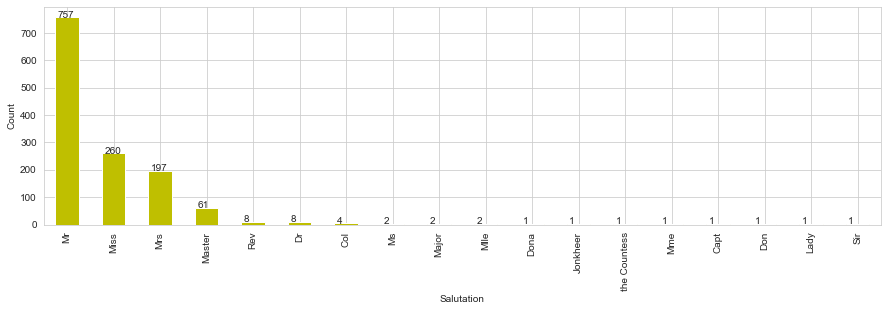

In [43]:
barplot = dataset["Salutation"].value_counts().plot(kind='bar', figsize=(15,4), color='y')
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.text(bar.get_x()+(-0.2) + bar.get_width()/2.0, yval, int(yval))
    
barplot.set_ylabel("Count")
barplot.set_xlabel("Salutation")

* Let us group less frequent salutations together.

Text(0.5, 0, 'Salutation')

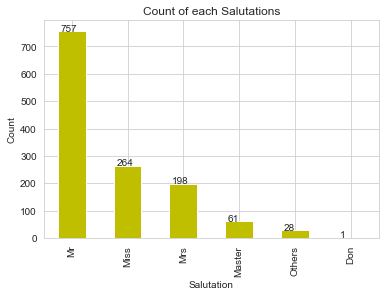

In [44]:
dataset['Salutation'] = dataset['Salutation'].replace(['Dr', 'Rev', 'Col', 'Major', 'the Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Dona'], 'Others')
dataset['Salutation'] = dataset['Salutation'].replace(['Mlle','Ms'], 'Miss')
dataset['Salutation'] = dataset['Salutation'].replace('Mme', 'Mrs')
barplot = dataset["Salutation"].value_counts().plot(kind='bar', color='y')
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.text(bar.get_x()+(-0.2) + bar.get_width()/2.0, yval, int(yval))
barplot.set_title("Count of each Salutations")
barplot.set_ylabel("Count")
barplot.set_xlabel("Salutation")

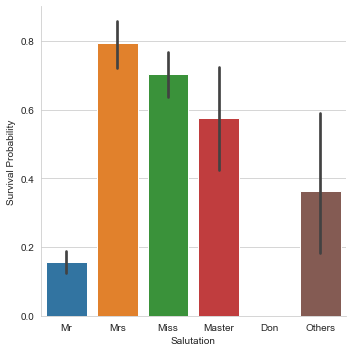

In [45]:
g = sns.factorplot(x="Salutation",y="Survived",data=dataset,kind="bar")
g.set_axis_labels(y_var='Survival Probability')

* Females and Male Children had greater probabilities of survival, followed by Others.

In [46]:
titles = {"Mr": 1, "Mrs": 2,"Miss": 3, "Master": 4, "Others": 5}
dataset['Salutation'] = dataset['Salutation'].map(titles)

# # filling NaN with 0, to get safe
dataset['Salutation'] = dataset['Salutation'].fillna(0)

In [47]:
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [48]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,S,1.0
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,C,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,3.0
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,S,2.0
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,S,1.0


#### *Family Size*

* From the data analysis part, we concluded that it might be useful to combine Parch and SibSp, owing to our thought that larger families might have had difficulties escaping from the danger while waiting for their deat ones.
* So let us create a new feature Fsize representing the family size.

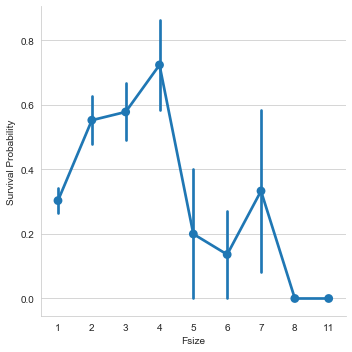

In [49]:
dataset['Fsize'] = dataset['Parch']+dataset['SibSp']+1
g = sns.factorplot(x="Fsize",y="Survived",data = dataset)
g = g.set_ylabels("Survival Probability")

* Individuals with no family and larger families had poor survival probabilities.

In [50]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Fsize
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,S,1.0,2
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,C,2.0,2
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,3.0,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,S,2.0,2
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,S,1.0,1


#### Embarked

In [51]:
ports = {"S": 0, "C": 1, "Q": 2}

dataset['Embarked'] = dataset['Embarked'].map(ports)

#### Drop PassengerId

In [52]:
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [53]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Fsize
0,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,0,1.0,2
1,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,1,2.0,2
2,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,0,3.0,1
3,1.0,1,1,35.0,1,0,113803,3.972177,C123,0,2.0,2
4,0.0,3,0,35.0,0,0,373450,2.085672,NaN,0,1.0,1


#### Cabin

* Owing to a significant percentage of missing values for *Cabin*, I thought of removing the column.
* But I had a thought that having *Cabin* might have influenced influence survival probability.
* Let us explore deeper about *Cabin*.

In [54]:
dataset["Cabin"].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [55]:
dataset["Cabin"][dataset["Cabin"].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [56]:
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

In [57]:
dataset.Cabin.unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

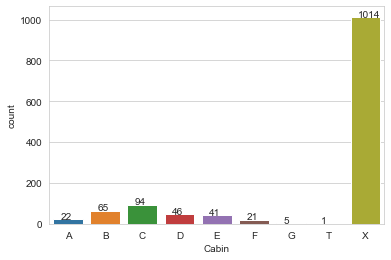

In [58]:
g = sns.countplot(dataset["Cabin"],order=['A','B','C','D','E','F','G','T','X'])
for bar in g.patches:
    yval = bar.get_height()
    g.text(bar.get_x()+(-0.2) + bar.get_width()/2.0, yval, int(yval))

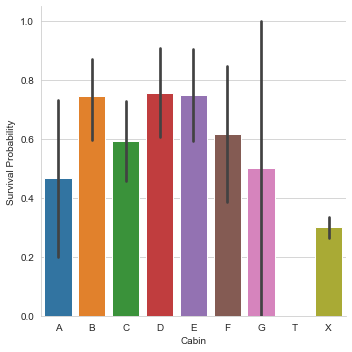

In [59]:
g = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

* Thus it is evident that passengers without Cabin had the least probability of survival.

In [60]:
cabin_series = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8, "X":9}
dataset['Cabin'] = dataset['Cabin'].map(cabin_series)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Fsize
0,0.0,3,0,22.0,1,0,A/5 21171,1.981001,9,0,1.0,2
1,1.0,1,1,38.0,1,0,PC 17599,4.266662,3,1,2.0,2
2,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,9,0,3.0,1
3,1.0,1,1,35.0,1,0,113803,3.972177,3,0,2.0,2
4,0.0,3,0,35.0,0,0,373450,2.085672,9,0,1.0,1


#### Ticket

In [61]:
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [62]:
dataset['Ticket'].isnull().sum()

0

In [63]:
Ticket = []
Ticket_List = list(dataset.Ticket)
for i, ticket in enumerate(Ticket_List):
    print(ticket)
    if not ticket.isdigit() :
        t = ticket.replace(".","").replace("/","").strip().split(' ')[0] 
    else:
        t = 'X'
    Ticket.append(t)
    dataset["Ticket"].iloc[i] = t

len(list(set(Ticket)))   

A/5 21171
PC 17599
STON/O2. 3101282
113803
373450
330877
17463
349909
347742
237736
PP 9549
113783
A/5. 2151
347082
350406
248706
382652
244373
345763
2649
239865
248698
330923
113788
349909
347077
2631
19950
330959
349216
PC 17601
PC 17569
335677
C.A. 24579
PC 17604
113789
2677
A./5. 2152
345764
2651
7546
11668
349253
SC/Paris 2123
330958
S.C./A.4. 23567
370371
14311
2662
349237
3101295
A/4. 39886
PC 17572
2926
113509
19947
C.A. 31026
2697
C.A. 34651
CA 2144
2669
113572
36973
347088
PC 17605
2661
C.A. 29395
S.P. 3464
3101281
315151
C.A. 33111
CA 2144
S.O.C. 14879
2680
1601
348123
349208
374746
248738
364516
345767
345779
330932
113059
SO/C 14885
3101278
W./C. 6608
SOTON/OQ 392086
19950
343275
343276
347466
W.E.P. 5734
C.A. 2315
364500
374910
PC 17754
PC 17759
231919
244367
349245
349215
35281
7540
3101276
349207
343120
312991
349249
371110
110465
2665
324669
4136
2627
STON/O 2. 3101294
370369
11668
PC 17558
347082
S.O.C. 14879
A4. 54510
237736
27267
35281
2651
370372
C 17369
2668
3470

S.O./P.P. 2
315092
383123
112901
113781
392091
12749
350026
315091
2658
LP 1588
368364
PC 17760
AQ/3. 30631
PC 17569
28004
350408
C.A. 31029
347075
2654
244368
113790
24160
SOTON/O.Q. 3101309
230136
PC 17585
2003
236854
C.A. 33112
PC 17580
2684
2653
349229
110469
244360
2675
C.A. 31029
2622
C.A. 15185
350403
CA. 2343
PC 17755
A/5. 851
348125
237670
2688
248726
F.C.C. 13528
PC 17759
F.C.C. 13540
S.O.C. 14879
220845
C.A. 2315
113044
11769
1222
368402
349910
CA. 2343
S.C./PARIS 2079
CA 31352
315083
11765
CA. 2343
2689
3101295
112378
SC/PARIS 2147
28133
16966
112058
248746
33638
PC 17608
315152
29107
680
347077
366713
330910
364498
376566
SC/PARIS 2159
220845
349911
244346
364858
349909
12749
PC 17592
C.A. 2673
C.A. 30769
315153
13695
371109
13567
347065
21332
36928
28664
112378
113059
17765
SC/PARIS 2166
28666
113503
334915
SOTON/O.Q. 3101315
365237
19928
347086
A.5. 3236
PC 17758
SOTON/O.Q. 3101262
359309
2668


37

In [64]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Fsize
0,0.0,3,0,22.0,1,0,A5,1.981001,9,0,1.0,2
1,1.0,1,1,38.0,1,0,PC,4.266662,3,1,2.0,2
2,1.0,3,1,26.0,0,0,STONO2,2.070022,9,0,3.0,1
3,1.0,1,1,35.0,1,0,X,3.972177,3,0,2.0,2
4,0.0,3,0,35.0,0,0,X,2.085672,9,0,1.0,1


In [65]:
ticket_map = {}
value = 1
for i in set(Ticket):
    ticket_map[i]=value
    value+=1
len(ticket_map)

37

In [66]:
dataset['Ticket'] = dataset['Ticket'].map(ticket_map)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Fsize
0,0.0,3,0,22.0,1,0,32,1.981001,9,0,1.0,2
1,1.0,1,1,38.0,1,0,35,4.266662,3,1,2.0,2
2,1.0,3,1,26.0,0,0,36,2.070022,9,0,3.0,1
3,1.0,1,1,35.0,1,0,7,3.972177,3,0,2.0,2
4,0.0,3,0,35.0,0,0,7,2.085672,9,0,1.0,1


### Split Train and Test Data

In [67]:
train = dataset[:len(train_df)]
test = dataset[len(train_df):]
test.drop(labels = ["Survived"], axis = 1, inplace = True)
print(list(train.columns))
print(list(test.columns))

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Salutation', 'Fsize']
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Salutation', 'Fsize']


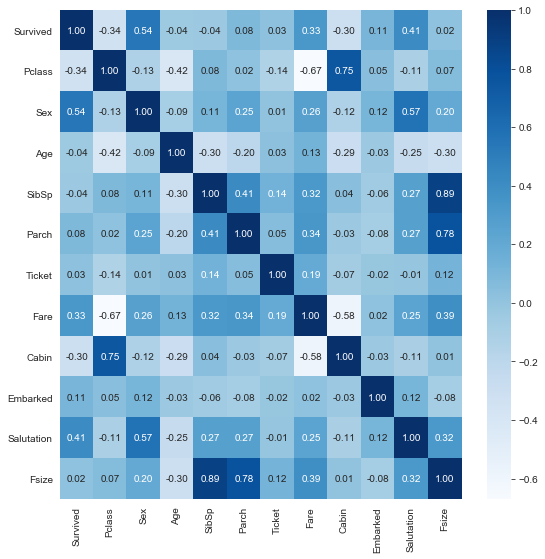

In [70]:
fig, axes = plt.subplots(figsize=(9,9))
g = sns.heatmap(train.corr(),annot=True, fmt = ".2f", cmap = "Blues", ax=axes)

* Not removing *Cabin* had been a good idea, as it negatively correlates with Survival.
* Sex, Pclass and Salutation had some impact in deciding the Survival.


In [71]:
train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"],axis = 1)

print("X_train: ",X_train.shape)
print("Y_train ",Y_train.shape)
print("test ", test.shape)

X_train:  (891, 11)
Y_train  (891,)
test  (418, 11)


### Modeling